# Exercises in neural network and deep learning II

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

In [2]:
df_adult = pd.read_csv("adult.csv")
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Data cleaning and transformation

In [3]:
df_adult = df_adult.replace({"<=50K.": "<=50K", ">50K.": ">50K"})
df_adult["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [4]:
print(df_adult.isna().sum())

df_adult = df_adult.dropna()

print(df_adult.isna().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
df_adult = df_adult.join(pd.get_dummies(df_adult["workclass"], drop_first=True, dtype=int)) # one hot encoding
df_adult = df_adult.join(pd.get_dummies(df_adult["education"], drop_first=True, dtype=int))
df_adult = df_adult.join(pd.get_dummies(df_adult["sex"], drop_first=True, dtype=int))
df_adult = df_adult.join(pd.get_dummies(df_adult["income"], drop_first=True, dtype=int))

df_adult = df_adult.drop(columns = ["income", "workclass", "education", "education-num", "occupation", "race", "capital-loss", "fnlwgt", "marital-status", "relationship", "sex", "native-country"])

In [6]:
df_adult

,age,capital-gain,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Male,>50K
0,39,2174,40,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,50,0,13,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,38,0,40,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,53,0,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,0,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,0,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
48837,39,0,36,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
48839,38,0,50,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
48840,44,5455,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [7]:
X_adult = df_adult.drop(columns = [">50K"]) # dropping income >50K
y_adult = df_adult[">50K"]

### Training preperation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_adult, y_adult, test_size=0.25, random_state=17)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

### Model training

In [11]:
def plot_train_validation(history, metrics):
    acc = history.history[metrics[0]]
    epochs = range(1, len(acc) + 1)
    for metric in metrics:  
        val_acc = history.history["val_" + metric]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        plt.plot(epochs, acc, label="Training " + metric)
        plt.plot(epochs, val_acc, label="Validation " + metric)
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.figure()

    acc = history.history[metric]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    plt.plot(epochs, loss, label="Training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

In [12]:
def setup_model(loss_func="binary_crossentropy", output_layer_activation="sigmoid"):
    model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation=output_layer_activation)
    ])

    model.compile(optimizer="rmsprop",
              loss=loss_func,
              metrics=["accuracy"])
    return model

In [13]:
def fit_model(model, X_train, y_train, _epochs=50, _batch_size=64, _verbose=1):
    history = model.fit(X_train,
                        y_train,
                        epochs=_epochs,
                        batch_size=_batch_size,
                        validation_split=0.2,
                        verbose=_verbose)

    return history, model

In [14]:
adult_model = setup_model()

In [15]:
adult_history, adult_model = fit_model(adult_model, X_train, y_train, 80, 128)

Epoch 1/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7315 - loss: 0.5902 - val_accuracy: 0.7932 - val_loss: 0.4398
Epoch 2/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 0.4477 - val_accuracy: 0.8079 - val_loss: 0.4160
Epoch 3/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4316 - val_accuracy: 0.8172 - val_loss: 0.4063
Epoch 4/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8122 - loss: 0.4105 - val_accuracy: 0.8221 - val_loss: 0.3985
Epoch 5/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.4140 - val_accuracy: 0.8230 - val_loss: 0.3936
Epoch 6/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4057 - val_accuracy: 0.8265 - val_loss: 0.3903
Epoch 7/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8152 - loss: 0.4072 - val_accuracy: 0.8270 - val_loss: 0.3881
Epoch 8/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.3961 - val_accuracy: 0.

In [ ]:
score = adult_model.evaluate(X_test, y_test, verbose=0) # loss = 0.5, kinda random
print("Test loss:", score[0])
print("Test accuracy:", score[1]) # 80, 128

Test loss: 0.38932350277900696
Test accuracy: 0.8266420364379883


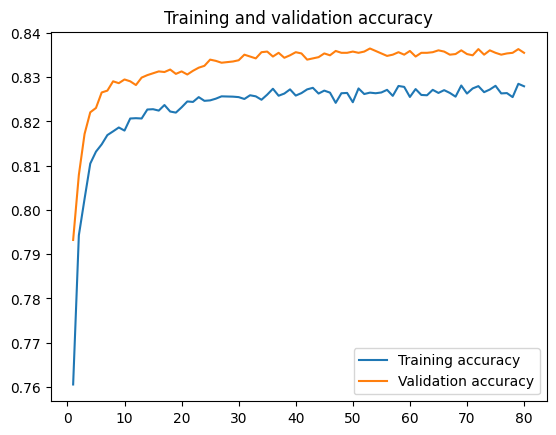

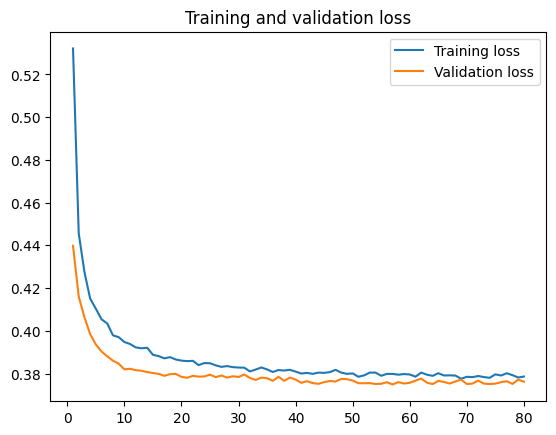

In [17]:
plot_train_validation(adult_history, ["accuracy"])